# Logistic Regression

    Notebook version: 2.0 (Nov 21, 2017)
                      2.1 (Oct 19, 2018)
                      2.2 (Oct 09, 2019)
                      2.3 (Oct 27, 2020)

    Author: Jesús Cid Sueiro (jcid@tsc.uc3m.es)
            Jerónimo Arenas García (jarenas@tsc.uc3m.es)

    Changes: v.1.0 - First version
             v.1.1 - Typo correction. Prepared for slide presentation
             v.2.0 - Prepared for Python 3.0 (backcompmatible with 2.7)
                     Assumptions for regression model modified
             v.2.1 - Minor changes regarding notation and assumptions
             v.2.2 - Updated notation
             v.2.3 - Improved slides format. Backward compatibility removed

In [21]:
# To visualize plots in the notebook
%matplotlib inline

# Imported libraries
import csv
import random
import matplotlib
import matplotlib.pyplot as plt
import pylab

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model


## 1. Introduction

### 1.1. Binary classification

The **goal** of a classification problem is to assign a *class* or *category* to every *instance* or *observation* of a data collection. 

Here, we will assume that 

   * every instance ${\bf x}$ is an $N$-dimensional vector in $\mathbb{R}^N$, and 
   * the class $y$ of sample ${\bf x}$ is an element of a binary set ${\mathcal Y} = \{0, 1\}$. 

The goal of a classifier is to predict the true value of $y$ after observing ${\bf x}$.

We will denote as $\hat{y}$ the classifier output or **decision**. If $y=\hat{y}$, the decision is a **hit**, otherwise $y\neq \hat{y}$ and the decision is an **error**.

### 1.2. Decision theory: the MAP criterion

**Decision theory** provides a solution to the classification problem in situations where the relation between instance ${\bf x}$ and its class $y$ is given by a known probabilistic model.

Assume that every tuple $({\bf x}, y)$ is an outcome of a random vector $({\bf X}, Y)$ with joint distribution $p_{{\bf X},Y}({\bf x}, y)$. A natural criteria for classification is to select predictor $\hat{Y}=f({\bf x})$ in such a way that the **probability or error**, $P\{\hat{Y} \neq Y\}$ is minimum. 

Noting that

$$
P\{\hat{Y} \neq Y\} = \int P\{\hat{Y} \neq Y | {\bf x}\} p_{\bf X}({\bf x}) d{\bf x}
$$

the optimal decision maker should take, for every sample ${\bf x}$, the decision minimizing the **conditional error probability**:

\begin{align}
\hat{y}^* &= \arg\min_{\hat{y}} P\{Y \neq \hat{y} |{\bf x}\} \\
          &= \arg\max_{\hat{y}} P\{Y = \hat{y} |{\bf x}\} \\
\end{align}


Thus, the **optimal decision rule** can be expressed as

$$
P_{Y|{\bf X}}(1|{\bf x}) \quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0}\quad  P_{Y|{\bf X}}(0|{\bf x}) 
$$

or, equivalently

$$
P_{Y|{\bf X}}(1|{\bf x}) \quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0}\quad  \frac{1}{2} 
$$

The classifier implementing this decision rule is usually referred to as the MAP (*Maximum A Posteriori*) classifier. As we have seen, the MAP classifier minimizes the error probability for binary classification, but the result can also be generalized to multiclass classification problems.

### 1.3. Learning

**Classical decision theory** is grounded on the assumption that the probabilistic model relating the observed sample ${\bf X}$ and the true hypothesis $Y$ is known. 

Unfortunately, this is unrealistic in many applications, where the only available information to construct the classifier is a **dataset** $\mathcal D = \{{\bf x}_k, y_k\}_{k=0}^{K-1}$ of instances and their respective class labels.

A more realistic formulation of the classification problem is the following: given a dataset $\mathcal D = \{({\bf x}_k, y_k) \in {\mathbb{R}}^N \times {\mathcal Y}, \, k=0,\ldots,{K-1}\}$ of independent and identically distributed (i.i.d.) samples from an ***unknown*** distribution $p_{{\bf X},Y}({\bf x}, y)$, predict the class $y$ of a new sample ${\bf x}$ with the minimum probability of error.


### 1.4. Parametric classifiers

Since the probabilistic model generating the data is unknown, the MAP decision rule cannot be applied. However, we can use the dataset to **estimate the a posterior class probability model**, and apply it to approximate the MAP decision maker.

**Parametric classifiers** based on this idea assume, additionally, that the posterior class probabilty satisfies some parametric formula:

$$
P_{Y|X}(1|{\bf x},{\bf w}) = f_{\bf w}({\bf x})
$$

where ${\bf w}$ is a vector of parameters. Given the expression of the MAP decision maker, classification consists in comparing the value of $f_{\bf w}({\bf x})$ with the threshold $\frac{1}{2}$, and each parameter vector would be associated to a different decision maker.


<img src="./figs/parametric_decision.png" width=400>

In practice, the dataset ${\mathcal D}$ is used to select a particular parameter vector $\hat{\bf w}$ according to certain criterion. Accordingly, the decision rule becomes

$$
f_{\hat{\bf w}}({\bf x}) \quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0}\quad  \frac{1}{2} 
$$


In this notebook, we explore one of the most popular model-based parametric classification methods: **logistic regression**.



## 2. Logistic regression.

### 2.1. The logistic function

The **logistic regression model** assumes that the binary class label $Y \in \{0,1\}$ of observation $X\in \mathbb{R}^N$ satisfies the expression.

$$P_{Y|{\bf X}}(1|{\bf x}, {\bf w}) = g({\bf w}^\intercal{\bf x})$$
$$P_{Y|{\bf,X}}(0|{\bf x}, {\bf w}) = 1-g({\bf w}^\intercal{\bf x})$$

where ${\bf w}$ is a parameter vector and $g(·)$ is the **logistic** function, which is defined by

$$g(t) = \frac{1}{1+\exp(-t)}$$


The code below defines and plots the logistic function:

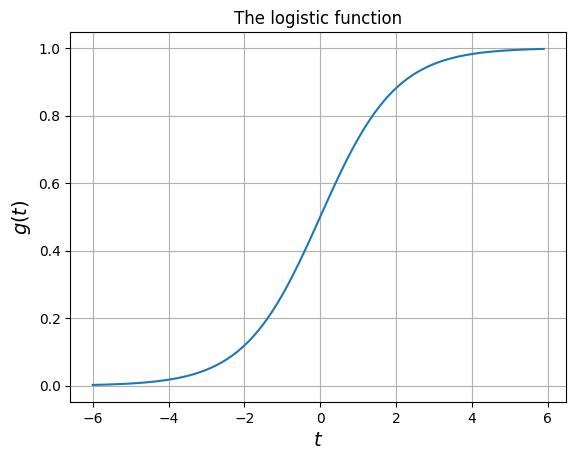

In [22]:
# Define the logistic function
def logistic(t):
    g = 1/(1+np.exp(-t))
    return g

# Plot the logistic function
t = np.arange(-6, 6, 0.1)
z = logistic(t)
plt.plot(t, z)
plt.xlabel('$t$', fontsize=14)
plt.ylabel('$g(t)$', fontsize=14)
plt.title('The logistic function')
plt.grid()

It is straightforward to see that the logistic function has the following properties:

- **P1**: Probabilistic output: $\quad 0 \le g(t) \le 1$
- **P2**: Symmetry: $\quad g(-t) = 1-g(t)$
- **P3**: Monotonicity: $\quad g'(t) = g(t)\cdot [1-g(t)] \ge 0$


**Exercise 1**: Verify properties P2 and P3.

**Exercise 2**: Implement a function to compute the logistic function, and use it to plot such function in the inverval $[-6,6]$.

### 2.2. Classifiers based on the logistic model.

The MAP classifier under a logistic model will have the form

$$P_{Y|{\bf X}}(1|{\bf x}, {\bf w}) = g({\bf w}^\intercal{\bf x}) \quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0} \quad \frac{1}{2} $$

Therefore
$$
2 \quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0} \quad  
1 + \exp(-{\bf w}^\intercal{\bf x}) $$

which is equivalent to
$${\bf w}^\intercal{\bf x} 
\quad\mathop{\gtrless}^{\hat{y}=1}_{\hat{y}=0}\quad 
0 $$

Thus, the classifiers based on the logistic model are given by **linear decision boundaries** passing through the origin, ${\bf x} = {\bf 0}$. 

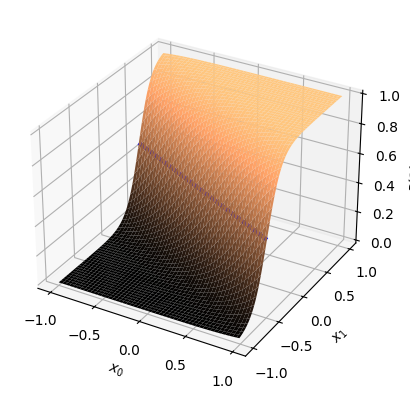

In [23]:
# Weight vector:
w = [4, 8]   # Try different weights
# Lo que se tiene en cuenta de cada x 
# Create a rectangular grid.
x_min = -1
x_max = 1
h = (x_max - x_min) / 200
xgrid = np.arange(x_min, x_max, h)
xx0, xx1 = np.meshgrid(xgrid, xgrid)

# Compute the logistic map for the given weights, and plot
Z = logistic(w[0]*xx0 + w[1]*xx1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx0, xx1, Z, cmap=plt.cm.copper)
ax.contour(xx0, xx1, Z, levels=[0.5], colors='b', linewidths=(3,))
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
ax.set_zlabel('P(1|x,w)')
plt.show()

The next code fragment represents the output of the same classifier, representing the output of the logistic function in the $x_0$-$x_1$ plane, encoding the value of the logistic function in the color map.

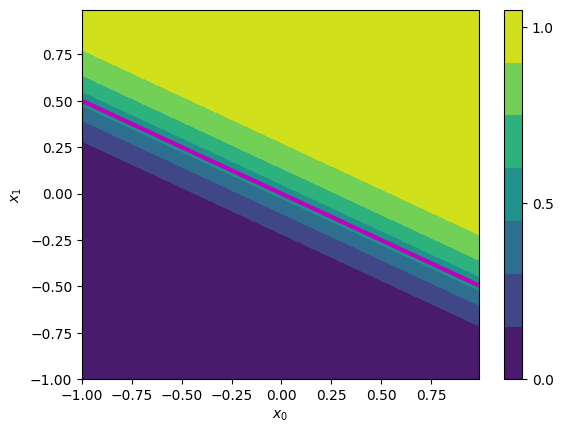

In [26]:
CS = plt.contourf(xx0, xx1, Z)
CS2 = plt.contour(CS, levels=[0.5], colors='m', linewidths=(3,))
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.colorbar(CS, ticks=[0, 0.5, 1])
plt.show()

### 3.3. Nonlinear classifiers.

The logistic model can be extended to construct non-linear classifiers by using **non-linear data transformations**. A general form for a nonlinear logistic regression model is

$$P_{Y|{\bf X}}(1|{\bf x}, {\bf w}) = g[{\bf w}^\intercal{\bf z}({\bf x})] $$

where ${\bf z}({\bf x})$ is an arbitrary nonlinear transformation of the original variables. The boundary decision in that case is given by equation
$$
{\bf w}^\intercal{\bf z} = 0
$$

**Exercise 3**: Modify the code above to generate a 3D surface plot of the polynomial logistic regression model given by

$$
P_{Y|{\bf X}}(1|{\bf x}, {\bf w}) = g(1 + 10 x_0 + 10 x_1 - 20 x_0^2 + 5 x_0 x_1 + x_1^2) 
$$

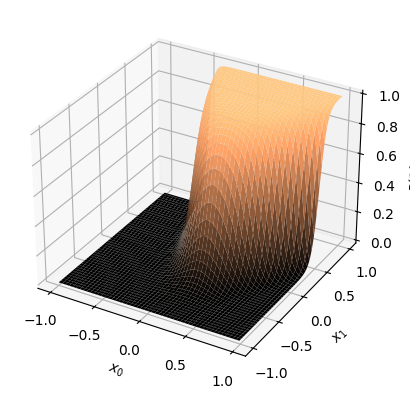

In [29]:
# Weight vector:
w = [1, 10, 10, -20, 5, 1]   # Try different weights

# Create a regtangular grid.
x_min = -1
x_max = 1
h = (x_max - x_min) / 200
xgrid = np.arange(x_min, x_max, h)
xx0, xx1 = np.meshgrid(xgrid, xgrid)

# Compute the logistic map for the given weights
Z = logistic(w[0] + w[1]*xx0 + w[2]*xx1 + w[3]*xx0*xx0 + w[4]*xx0*xx1 + w[5]*xx1*xx1)
# Plot the logistic map
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xx0, xx1, Z, cmap=plt.cm.copper)
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
ax.set_zlabel('P(1|x,w)')
plt.show()

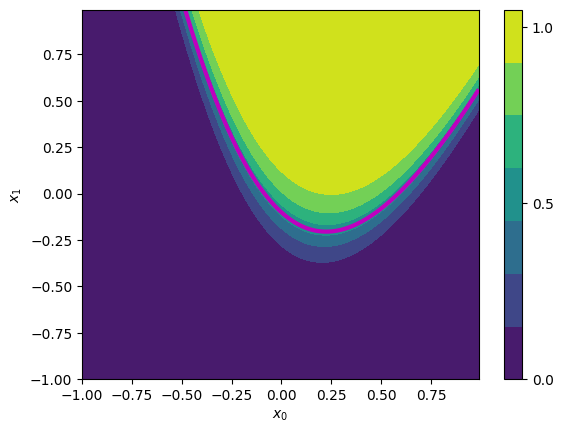

In [30]:
CS = plt.contourf(xx0, xx1, Z)
CS2 = plt.contour(CS, levels=[0.5], colors='m', linewidths=(3,))
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.colorbar(CS, ticks=[0, 0.5, 1])
plt.show()

## 3. Inference

Remember that the idea of parametric classification is to use the training data set $\mathcal D = \{({\bf x}_k, y_k) \in {\mathbb{R}}^N \times \{0,1\}, k=0,\ldots,{K-1}\}$ to estimate ${\bf w}$. The estimate, $\hat{\bf w}$, can be used to compute the label prediction for any new observation as 

$$\hat{y} = \arg\max_y P_{Y|{\bf X}}(y|{\bf x},\hat{\bf w}).$$

<img src="figs/parametric_decision.png" width=400>



In this notebook, we will discuss two different approaches to the estimation of ${\bf w}$:

   * **Maximum Likelihood** (ML): $\hat{\bf w}_{\text{ML}} = \arg\max_{\bf w} P_{{\mathcal D}|{\bf W}}({\mathcal D}|{\bf w})$
   * **Maximum *A Posteriori** (MAP): $\hat{\bf w}_{\text{MAP}} = \arg\max_{\bf w} p_{{\bf W}|{\mathcal D}}({\bf w}|{\mathcal D})$



For the mathematical derivation of the logistic regression algorithm, the following representation of the logistic model will be useful: using the **symmetry** property of the logistic function, we can write

$$P_{Y|{\bf X}}(0|{\bf x}, {\bf w}) = 1-g\left({\bf w}^\intercal{\bf z}({\bf x})\right)
= g\left(-{\bf w}^\intercal{\bf z}({\bf x})\right)$$

thus

$$P_{Y|{\bf X}}(y|{\bf x}, {\bf w}) = g\left(\overline{y}{\bf w}^\intercal{\bf z}({\bf x})\right)$$

where $\overline{y} = 2y-1$ is a **symmetrized label** ($\overline{y}\in\{-1, 1\}$). 

### 3.1. Model assumptions

In the following, we will make the following assumptions:

- **A1**. (Logistic Regression): We assume a logistic model for the *a posteriori* probability of ${Y}$ given ${\bf X}$, i.e.,

$$P_{Y|{\bf X}}(y|{\bf x}, {\bf w}) = g\left({\bar y}\cdot {\bf w}^\intercal{\bf z}({\bf x})\right).$$

- **A2**. All samples in ${\mathcal D}$ have been generated from the same distribution, $p_{{\bf X}, Y| {\bf W}}({\bf x}, y| {\bf w})$.

- **A3**. Input variables $\bf x$ do not depend on $\bf w$. This implies that  $p({\bf x}|{\bf w}) = p({\bf x})$

- **A4**. Targets $y_0, \cdots, y_{K-1}$ are statistically independent given $\bf w$ and the inputs ${\bf x}_0, \cdots, {\bf x}_{K-1}$, that is:

$$P(y_0, \cdots, y_{K-1} | {\bf x}_0, \cdots, {\bf x}_{K-1}, {\bf w}) = \prod_{k=0}^{K-1} P(y_k | {\bf x}_k, {\bf w})$$

### 3.2. ML estimation.

The ML estimate is defined as

$$\hat{\bf w}_{\text{ML}} = \arg\max_{\bf w} P_{{\mathcal D}|{\bf W}}({\mathcal D}|{\bf w})$$

Ussing assumptions A2 and A3 above, we have that

\begin{align}
P_{{\mathcal D}|{\bf W}}({\mathcal D}|{\bf w}) & =  p(y_0, \cdots, y_{K-1},{\bf x}_0, \cdots, {\bf x}_{K-1}| {\bf w}) \\
& =  P(y_0, \cdots, y_{K-1}|{\bf x}_0, \cdots, {\bf x}_{K-1}, {\bf w}) \; p({\bf x}_0, \cdots, {\bf x}_{K-1}| {\bf w}) \\
& = P(y_0, \cdots, y_{K-1}|{\bf x}_0, \cdots, {\bf x}_{K-1}, {\bf w}) \; p({\bf x}_0, \cdots, {\bf x}_{K-1})\end{align}

Finally, using assumption A4, we can formulate the ML estimation of $\bf w$ as the resolution of the following **optimization problem**

\begin{align}
\hat {\bf w}_\text{ML} & = \arg \max_{\bf w} P(y_0, \cdots, y_{K-1}|{\bf x}_0, \cdots, {\bf x}_{K-1}, {\bf w}) \\
& = \arg \max_{\bf w} \prod_{k=0}^{K-1} P(y_k|{\bf x}_k, {\bf w}) \\
& = \arg \max_{\bf w} \sum_{k=0}^{K-1} \log P(y_k|{\bf x}_k, {\bf w}) \\
& = \arg \min_{\bf w} \sum_{k=0}^{K-1} - \log P(y_k|{\bf x}_k, {\bf w})
\end{align}

where the arguments of the maximization or minimization problems of the last three lines are usually referred to as the **likelihood**, **log-likelihood** $\left[L(\bf w)\right]$, and **negative log-likelihood** $\left[\text{NLL}(\bf w)\right]$, respectively.


Now, using A1 (the logistic model)

\begin{align}
\text{NLL}({\bf w}) 
    &= - \sum_{k=0}^{K-1}\log\left[g\left(\overline{y}_k{\bf w}^\intercal {\bf z}_k\right)\right]   \\
    &= \sum_{k=0}^{K-1}\log\left[1+\exp\left(-\overline{y}_k{\bf w}^\intercal {\bf z}_k\right)\right]
\end{align}

where ${\bf z}_k={\bf z}({\bf x}_k)$.



It can be shown that $\text{NLL}({\bf w})$ is a **convex** and **differentiable** function of ${\bf w}$. Therefore, its minimum is a point with zero gradient.

\begin{align}
\nabla_{\bf w} \text{NLL}(\hat{\bf w}_{\text{ML}}) 
    &= - \sum_{k=0}^{K-1} 
       \frac{\exp\left(-\overline{y}_k\hat{\bf w}_{\text{ML}}^\intercal {\bf z}_k\right) \overline{y}_k {\bf z}_k}
       {1+\exp\left(-\overline{y}_k\hat{\bf w}_{\text{ML}}^\intercal {\bf z}_k
       \right)} = \\
    &= - \sum_{k=0}^{K-1} \left[y_k-g(\hat{\bf w}_{\text{ML}}^T {\bf z}_k)\right] {\bf z}_k = 0
\end{align}

Unfortunately, $\hat{\bf w}_{\text{ML}}$ cannot be taken out from the above equation, and some iterative optimization algorithm must be used to search for the minimum.

### 3.3. Gradient descent.

A simple iterative optimization algorithm is <a href = https://en.wikipedia.org/wiki/Gradient_descent> gradient descent</a>. 

\begin{align}
{\bf w}_{n+1} = {\bf w}_n - \rho_n \nabla_{\bf w} \text{NLL}({\bf w}_n)
\end{align}

where $\rho_n >0$ is the *learning step*.

Applying the gradient descent rule to logistic regression, we get the following algorithm:

\begin{align}
{\bf w}_{n+1} &= {\bf w}_n 
    + \rho_n \sum_{k=0}^{K-1} \left[y_k-g({\bf w}_n^\intercal {\bf z}_k)\right] {\bf z}_k
\end{align}


#### Gradient descent in matrix form

Defining vectors

\begin{align}
{\bf y} &= [y_0,\ldots,y_{K-1}]^\top \\
\hat{\bf p}_n &= [g({\bf w}_n^\top {\bf z}_0), \ldots, g({\bf w}_n^\top {\bf z}_{K-1})]^\top
\end{align}
and matrix
\begin{align}
{\bf Z} = \left[{\bf z}_0,\ldots,{\bf z}_{K-1}\right]^\top
\end{align}

we can write

\begin{align}
{\bf w}_{n+1} &= {\bf w}_n 
    + \rho_n {\bf Z}^\top \left({\bf y}-\hat{\bf p}_n\right)
\end{align}

In the following, we will explore the behavior of the gradient descend method using the Iris Dataset.

In [ ]:
# Adapted from a notebook by Jason Brownlee
def loadDataset(filename, split):
    xTrain, cTrain, xTest, cTest = [], [], [], []

    with open(filename, 'r') as csvfile:
        lines = csv.reader(csvfile)
        dataset = list(lines)
    for i in range(len(dataset)-1):
        for y in range(4):
            dataset[i][y] = float(dataset[i][y])
        item = dataset[i]
        if random.random() < split:
            xTrain.append(item[0:4])
            cTrain.append(item[4])
        else:
            xTest.append(item[0:4])
            cTest.append(item[4])
    return xTrain, cTrain, xTest, cTest

xTrain_all, cTrain_all, xTest_all, cTest_all = loadDataset('iris.data', 0.66)
nTrain_all = len(xTrain_all)
nTest_all = len(xTest_all)
print('Train:', nTrain_all)
print('Test:', nTest_all)

Now, we select two classes and two attributes.

In [ ]:
# Select attributes
i = 0 # Try 0,1,2,3
j = 1 # Try 0,1,2,3 with j!=i

# Select two classes
c0 = 'Iris-versicolor' 
c1 = 'Iris-virginica'
# Select two coordinates
ind = [i, j]

# Take training test
X_tr = np.array([[xTrain_all[n][i] for i in ind] for n in range(nTrain_all) 
                  if cTrain_all[n]==c0 or cTrain_all[n]==c1])
C_tr = [cTrain_all[n] for n in range(nTrain_all) 
          if cTrain_all[n]==c0 or cTrain_all[n]==c1]
Y_tr = np.array([int(c==c1) for c in C_tr])
n_tr = len(X_tr)

# Take test set
X_tst = np.array([[xTest_all[n][i] for i in ind] for n in range(nTest_all) 
                 if cTest_all[n]==c0 or cTest_all[n]==c1])
C_tst = [cTest_all[n] for n in range(nTest_all) 
         if cTest_all[n]==c0 or cTest_all[n]==c1]
Y_tst = np.array([int(c==c1) for c in C_tst])
n_tst = len(X_tst)

#### 3.2.2. Data normalization

Normalization of data is a common pre-processing step in many machine learning algorithms. Its goal is to get a dataset where all input coordinates have a similar scale. Learning algorithms usually show less instabilities and convergence problems when data are normalized.

We will define a normalization function that returns a training data matrix with zero sample mean and unit sample variance.

In [ ]:
def normalize(X, mx=None, sx=None):   
    # Compute means and standard deviations
    if mx is None:
        mx = np.mean(X, axis=0)
    if sx is None:
        sx = np.std(X, axis=0)

    # Normalize
    X0 = (X-mx)/sx

    return X0, mx, sx

Now, we can normalize training and test data. Observe in the code that **the same transformation should be applied to training and test data**. This is the reason why normalization with the test data is done using the means and the variances computed with the training set.

In [ ]:
# Normalize data
Xn_tr, mx, sx = normalize(X_tr)
Xn_tst, mx, sx = normalize(X_tst, mx, sx)

The following figure generates a plot of the normalized training data.

In [ ]:
# Separate components of x into different arrays (just for the plots)
x0c0 = [Xn_tr[n][0] for n in range(n_tr) if Y_tr[n]==0]
x1c0 = [Xn_tr[n][1] for n in range(n_tr) if Y_tr[n]==0]
x0c1 = [Xn_tr[n][0] for n in range(n_tr) if Y_tr[n]==1]
x1c1 = [Xn_tr[n][1] for n in range(n_tr) if Y_tr[n]==1]

# Scatterplot.
labels = {'Iris-setosa': 'Setosa', 'Iris-versicolor': 'Versicolor',
          'Iris-virginica': 'Virginica'}
plt.plot(x0c0, x1c0,'r.', label=labels[c0])
plt.plot(x0c1, x1c1,'g+', label=labels[c1])
plt.xlabel('$x_' + str(ind[0]) + '$')
plt.ylabel('$x_' + str(ind[1]) + '$')
plt.legend(loc='best')
plt.axis('equal')
plt.show()

In order to apply the gradient descent rule, we need to define two methods: 
 - A `fit` method, that receives the training data and returns the model weights and the value of the negative log-likelihood during all iterations.
 - A `predict` method, that receives the model weight and a set of inputs, and returns the posterior class probabilities for that input, as well as their corresponding class predictions.

In [ ]:
def logregFit(Z_tr, Y_tr, rho, n_it):

    # Data dimension
    n_dim = Z_tr.shape[1]
    # Initialize variables
    nll_tr = np.zeros(n_it)
    pe_tr = np.zeros(n_it)
    Y_tr2 = 2*Y_tr - 1     # Transform labels into binary symmetric.
    w = np.random.randn(n_dim,1)

    # Running the gradient descent algorithm
    for n in range(n_it):
        # Compute posterior probabilities for weight w
        p1_tr = logistic(np.dot(Z_tr, w))
        # Compute negative log-likelihood
        # (note that this is not required for the weight update, only for nll tracking)
        nll_tr[n] = np.sum(np.log(1 + np.exp(-np.dot(Y_tr2*Z_tr, w)))) 
        # Update weights
        w += rho*np.dot(Z_tr.T, Y_tr - p1_tr)
    
    return w, nll_tr

def logregPredict(Z, w):
    # Compute posterior probability of class 1 for weights w.
    p = logistic(np.dot(Z, w)).flatten()    
    # Class
    D = [int(round(pn)) for pn in p]
    
    return p, D

We can test the behavior of the gradient descent method by fitting a logistic regression model with ${\bf z}({\bf x}) = (1, {\bf x}^\top)^\top$.

In [ ]:
# Parameters of the algorithms
rho = float(1)/50    # Learning step
n_it = 200   # Number of iterations

# Compute Z's
Z_tr = np.c_[np.ones(n_tr), Xn_tr] 
Z_tst = np.c_[np.ones(n_tst), Xn_tst]
n_dim = Z_tr.shape[1]

# Convert target arrays to column vectors
Y_tr2 = Y_tr[np.newaxis].T
Y_tst2 = Y_tst[np.newaxis].T

# Running the gradient descent algorithm
w, nll_tr = logregFit(Z_tr, Y_tr2, rho, n_it)

# Classify training and test data
p_tr, D_tr = logregPredict(Z_tr, w)
p_tst, D_tst = logregPredict(Z_tst, w)

# Compute error rates
E_tr = D_tr!=Y_tr
E_tst = D_tst!=Y_tst

# Error rates
pe_tr = float(sum(E_tr)) / n_tr
pe_tst = float(sum(E_tst)) / n_tst

In [ ]:
# NLL plot.
plt.plot(range(n_it), nll_tr,'b.:', label='Train')
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood')
plt.legend()

print(f'The optimal weights are: {w}')
print('The final error rates are:')
print(f'- Training: {pe_tr}')
print(f'- Test: {pe_tst}')
print(f'The NLL after training is {nll_tr[len(nll_tr)-1]}')

#### 3.2.3. Free parameters

Under certain conditions, the gradient descent method can be shown to converge asymptotically (i.e. as the number of iterations goes to infinity) to the ML estimate of the logistic model. However, in practice, the final estimate of the weights ${\bf w}$ depend on several factors:

- Number of iterations
- Initialization
- Learning step

**Exercise 4**: Visualize the variability of gradient descent caused by initializations. To do so, fix the number of iterations to 200 and the learning step, and execute the gradient descent 100 times, storing the training error rate of each execution. Plot the histogram of the error rate values.

Note that you can do this exercise with a loop over the 100 executions, including the code in the previous code slide inside the loop, with some proper modifications. To plot a histogram of the values in array `p` with `n`bins, you can use `plt.hist(p, n)`

##### 3.2.3.1. Learning step

The learning step, $\rho$, is a free parameter of the algorithm. Its choice is critical for the convergence of the algorithm. Too large values of $\rho$ make the algorithm diverge. For too small values, the convergence gets very slow and more iterations are required for a good convergence.


**Exercise 5**: Observe the evolution of the negative log-likelihood with the number of iterations for different values of $\rho$. It is easy to check that, for large enough $\rho$, the gradient descent method does not converge. Can you estimate (through manual observation) an approximate value of $\rho$ stating a boundary between convergence and divergence?

**Exercise 6**: In this exercise we explore the influence of the learning step more sistematically. Use the code in the previouse exercises to compute, for every value of $\rho$, the average error rate over 100 executions. Plot the average error rate vs. $\rho$. 

Note that you should explore the values of $\rho$ in a logarithmic scale. For instance, you can take $\rho = 1, \frac{1}{10}, \frac{1}{100}, \frac{1}{1000}, \ldots$

In practice, the selection of $\rho$ may be a matter of trial an error. Also there is some theoretical evidence that the learning step should decrease along time up to cero, and the sequence $\rho_n$ should satisfy two conditions:
- C1: $\sum_{n=0}^{\infty} \rho_n^2 < \infty$ (decrease slowly)
- C2: $\sum_{n=0}^{\infty} \rho_n = \infty$ (but not too slowly)

For instance, we can take $\rho_n= \frac{1}{n}$. Another common choice is $\rho_n = \frac{\alpha}{1+\beta n}$ where $\alpha$ and $\beta$ are also free parameters that can be selected by trial and error with some heuristic method.

#### 3.2.4. Visualizing the posterior map.

We can also visualize the posterior probability map estimated by the logistic regression model for the estimated weights.

In [ ]:
# Create a regtangular grid.
x_min, x_max = Xn_tr[:, 0].min(), Xn_tr[:, 0].max() 
y_min, y_max = Xn_tr[:, 1].min(), Xn_tr[:, 1].max()
dx = x_max - x_min
dy = y_max - y_min
h = dy /400
xx, yy = np.meshgrid(np.arange(x_min - 0.1 * dx, x_max + 0.1 * dx, h),
                     np.arange(y_min - 0.1 * dx, y_max + 0.1 * dy, h))
X_grid = np.array([xx.ravel(), yy.ravel()]).T

# Compute Z's
Z_grid = np.c_[np.ones(X_grid.shape[0]), X_grid] 

# Compute the classifier output for all samples in the grid.
pp, dd = logregPredict(Z_grid, w)

In [ ]:
# Paint output maps
pylab.rcParams['figure.figsize'] = 6, 6  # Set figure size
# Color plot
plt.plot(x0c0, x1c0,'r.', label=labels[c0])
plt.plot(x0c1, x1c1,'g+', label=labels[c1])
plt.xlabel('$x_' + str(ind[0]) + '$')
plt.ylabel('$x_' + str(ind[1]) + '$')
plt.legend(loc='best')
plt.axis('equal')
pp = pp.reshape(xx.shape)
CS = plt.contourf(xx, yy, pp, cmap=plt.cm.copper)
plt.contour(xx, yy, pp, levels=[0.5], colors='b', linewidths=(3,))
plt.colorbar(CS, ticks=[0, 0.5, 1])
plt.show()

#### 3.2.5. Polynomial Logistic Regression

The error rates of the logistic regression model can be potentially reduced by using polynomial transformations.

To compute the polynomial transformation up to a given degree, we can use the `PolynomialFeatures` method in `sklearn.preprocessing`.

In [ ]:
# Parameters of the algorithms
rho = float(1)/50    # Learning step
n_it = 500   # Number of iterations
g = 5 # Degree of polynomial

# Compute Z_tr
poly = PolynomialFeatures(degree=g)
Z_tr = poly.fit_transform(Xn_tr)
# Normalize columns (this is useful to make algorithms more stable).)
Zn, mz, sz = normalize(Z_tr[:,1:])
Z_tr = np.concatenate((np.ones((n_tr,1)), Zn), axis=1)

# Compute Z_tst
Z_tst = poly.fit_transform(Xn_tst)
Zn, mz, sz = normalize(Z_tst[:,1:], mz, sz)
Z_tst = np.concatenate((np.ones((n_tst,1)), Zn), axis=1)

# Convert target arrays to column vectors
Y_tr2 = Y_tr[np.newaxis].T
Y_tst2 = Y_tst[np.newaxis].T

# Running the gradient descent algorithm
w, nll_tr = logregFit(Z_tr, Y_tr2, rho, n_it)

# Classify training and test data
p_tr, D_tr = logregPredict(Z_tr, w)
p_tst, D_tst = logregPredict(Z_tst, w)
    
# Compute error rates
E_tr = D_tr!=Y_tr
E_tst = D_tst!=Y_tst

# Error rates
pe_tr = float(sum(E_tr)) / n_tr
pe_tst = float(sum(E_tst)) / n_tst

In [ ]:
# NLL plot.
plt.plot(range(n_it), nll_tr,'b.:', label='Train')
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood')
plt.legend()
print(f'The optimal weights are: {w.T}')
print('The final error rates are:')
print(f'- Training: {pe_tr} \n- Test: {pe_tst}')
print('The NLL after training is', nll_tr[len(nll_tr)-1])

Visualizing the posterior map we can se that the polynomial transformation produces nonlinear decision boundaries.

In [ ]:
# Compute Z_grid
Z_grid = poly.fit_transform(X_grid)
Zn, mz, sz = normalize(Z_grid[:,1:], mz, sz)
Z_grid = np.concatenate((np.ones((Z_grid.shape[0],1)), Zn), axis=1)

# Compute the classifier output for all samples in the grid.
pp, dd = logregPredict(Z_grid, w)
pp = pp.reshape(xx.shape)

In [ ]:
# Paint output maps
pylab.rcParams['figure.figsize'] = 6, 6  # Set figure size
plt.plot(x0c0, x1c0,'r.', label=labels[c0])
plt.plot(x0c1, x1c1,'g+', label=labels[c1])
plt.xlabel('$x_' + str(ind[0]) + '$')
plt.ylabel('$x_' + str(ind[1]) + '$')
plt.axis('equal')
plt.legend(loc='best')
CS = plt.contourf(xx, yy, pp, cmap=plt.cm.copper)
plt.contour(xx, yy, pp, levels=[0.5], colors='b', linewidths=(3,))
plt.colorbar(CS, ticks=[0, 0.5, 1])
plt.show()

## 4. Regularization and MAP estimation.

### 4.1 MAP estimation

An alternative to the ML estimation of the weights in logistic regression is Maximum A Posteriori estimation. Modelling the logistic regression weights as a random variable with prior distribution $p_{\bf W}({\bf w})$, the **MAP estimate** is defined as

$$
\hat{\bf w}_{\text{MAP}} = \arg\max_{\bf w} p({\bf w}|{\mathcal D})
$$

The posterior density $p({\bf w}|{\mathcal D})$ is related to the likelihood function and the prior density of the weights, $p_{\bf W}({\bf w})$ through the **Bayes rule**

$$
p({\bf w}|{\mathcal D}) = 
    \frac{P\left({\mathcal D}|{\bf w}\right) \; p_{\bf W}({\bf w})}
         {p\left({\mathcal D}\right)}
$$

In general, the denominator in this expression cannot be computed analytically. However, it is not required for MAP estimation because it does not depend on ${\bf w}$. Therefore, the MAP solution is given by

\begin{align}
\hat{\bf w}_{\text{MAP}} & = \arg\max_{\bf w} \left\{ P\left({\mathcal D}|{\bf w}\right) \; p_{\bf W}({\bf w}) \right\}\\
& = \arg\max_{\bf w} \left\{ L({\mathbf w}) + \log p_{\bf W}({\bf w})\right\} \\
& = \arg\min_{\bf w} \left\{ \text{NLL}({\mathbf w}) - \log p_{\bf W}({\bf w})\right\}
\end{align}

In the light of this expression, we can conclude that the MAP solution is affected by two terms:
   - The likelihood, which takes large values for parameter vectors $\bf w$ that fit well the training data (smaller $\text{NLL}$ values)
   - The prior distribution of weights $p_{\bf W}({\bf w})$, which expresses our *a priori* preference for some solutions.
   

### 4.2. Regularization

Even though the prior distribution has a natural interpretation as a model of our knowledge about $p({\bf w})$ before observing the data, its choice is frequenty motivated by the need to avoid data **overfitting**.

**Data overfitting** is a frequent problem in ML estimation when the dimension of ${\bf w}$ is much higher that the dimension of the input ${\bf x}$: the ML solution can be too adjusted to the training data, while the test error rate is large.

In practice **we recur to prior distributions that take large values when $\|{\bf w}\|$ is small** (associated to smooth classification borders). This helps to improve **generalization**.

In this way, the MAP criterion adds a **penalty term** to the ML objective, that penalizes parameter vectors for which the prior distribution of weights takes small values. 

In machine learning, the process of introducing penalty terms to avoid overfitting is usually named **regularization**. 

### 4.3 MAP estimation with Gaussian prior

If we assume that ${\bf W}$ follows a **zero-mean Gaussian** random variable with variance matrix $v{\bf I}$, 

$$
p_{\bf W}({\bf w}) = \frac{1}{(2\pi v)^{N/2}} \exp\left(-\frac{1}{2v}\|{\bf w}\|^2\right)
$$

the **MAP estimate** becomes

\begin{align}
\hat{\bf w}_{\text{MAP}} 
  &= \arg\min_{\bf w} \left\{\text{NLL}({\bf w}) + \frac{1}{C}\|{\bf w}\|^2
         \right\}
\end{align}

where $C = 2v$. Note that the **regularization term** associated to the prior penalizes parameter vectors with large components. Parameter $C$ controls the regularizatin, and it is named the **inverse regularization strength**.

Noting that

$$\nabla_{\bf w}\left\{\text{NLL}({\bf w}) + \frac{1}{C}\|{\bf w}\|^2\right\} 
= - {\bf Z} \left({\bf y}-\hat{\bf p}_n\right) + \frac{2}{C}{\bf w},
$$

we obtain the following **gradient descent rule** for MAP estimation

\begin{align}
{\bf w}_{n+1} &= \left(1-\frac{2\rho_n}{C}\right){\bf w}_n 
    + \rho_n {\bf Z} \left({\bf y}-\hat{\bf p}_n\right)
\end{align}

Note that the regularization term "pushes" the weights towards zero.


### 4.4 MAP estimation with Laplacian prior

If we assume that ${\bf W}$ follows a multivariate zero-mean Laplacian distribution given by

$$
p_{\bf W}({\bf w}) = \frac{1}{(2 C)^{N}} \exp\left(-\frac{1}{C}\|{\bf w}\|_1\right)
$$

(where $\|{\bf w}\|=|w_1|+\ldots+|w_N|$ is the $L_1$ norm of ${\bf w}$), the MAP estimate becomes

\begin{align}
\hat{\bf w}_{\text{MAP}} 
  &= \arg\min_{\bf w} \left\{\text{NLL}({\bf w}) + \frac{1}{C}\|{\bf w}\|_1
         \right\}
\end{align}

Parameter $C$ is named the *inverse regularization strength*.

**Exercise 7**: Derive the gradient descent rules for MAP estimation of the logistic regression weights with Laplacian prior.

## 5. Other optimization algorithms

### 5.1. Stochastic Gradient descent.

Stochastic gradient descent (SGD) is based on the idea of using a single sample at each iteration of the learning algorithm. The SGD rule for ML logistic regression is

\begin{align}
{\bf w}_{n+1} &= {\bf w}_n 
    + \rho_n {\bf z}_n \left(y_n-\hat{p}_n\right)
\end{align}

Once all samples in the training set have been applied, the algorith can continue by applying the training set several times.

The computational cost of each iteration of SGD is much smaller than that of gradient descent, though it usually needs many more iterations to converge.

**Exercise 8**: Modify logregFit to implement an algorithm that applies the SGD rule.

### 5.2. Newton's method

Assume that the function to be minimized, $C({\bf w})$, can be approximated by its **second order Taylor series expansion** around ${\bf w}_0$

$$ 
C({\bf w}) \approx C({\bf w}_0) 
+ \nabla_{\bf w}^\top C({\bf w}_0)({\bf w}-{\bf w}_0)
+ \frac{1}{2}({\bf w}-{\bf w}_0)^\top{\bf H}({\bf w}_0)({\bf w}-{\bf w}_0)
$$

where ${\bf H}({\bf w})$ is the <a href=https://en.wikipedia.org/wiki/Hessian_matrix> **Hessian matrix**</a> of $C$ at ${\bf w}$. Taking the gradient of $C({\bf w})$, and setting the result to ${\bf 0}$, the minimum of C around ${\bf w}_0$ can be approximated as

$$ 
{\bf w}^* = {\bf w}_0 - {\bf H}({\bf w}_0)^{-1} \nabla_{\bf w}^\top C({\bf w}_0)
$$

Since the second order polynomial is only an approximation to $C$, ${\bf w}^*$ is only an approximation to the optimal weight vector, but we can expect ${\bf w}^*$ to be closer to the minimizer of $C$ than ${\bf w}_0$. Thus, we can repeat the process, computing a second order approximation around ${\bf w}^*$ and a new approximation to the minimizer.


<a href=https://en.wikipedia.org/wiki/Newton%27s_method_in_optimization> **Newton's method**</a> is based on this idea. At each optimization step, the function to be minimized is approximated by a second order approximation using a Taylor series expansion around the current estimate. As a result, the learning rule becomes

$$\hat{\bf w}_{n+1} = \hat{\bf w}_{n} - \rho_n {\bf H}({\bf w}_n)^{-1} \nabla_{{\bf w}}C({\bf w}_n)
$$

#### 5.2.1. Example: MAP estimation with Gaussian prior.

For instance, for the MAP estimate with Gaussian prior, the *Hessian* matrix becomes

$$
{\bf H}({\bf w}) 
  = \frac{2}{C}{\bf I} 
  + \sum_{k=0}^{K-1} g({\bf w}^\top {\bf z}_k) 
                     \left[1-g({\bf w}^\top {\bf z}_k)\right]{\bf z}_k {\bf z}_k^\top
$$

Defining diagonal matrix

$$
{\mathbf S}({\bf w}) = \text{diag}\left[g({\bf w}^\top {\bf z}_k) \left(1-g({\bf w}^\top {\bf z}_k)\right)\right]
$$

the Hessian matrix can be written in more compact form as

$$
{\bf H}({\bf w}) 
  = \frac{2}{C}{\bf I} + {\bf Z}^\top {\bf S}({\bf w}) {\bf Z}
$$

Therefore, the Newton's algorithm for logistic regression becomes

\begin{align}
{\bf w}_{n+1} = {\bf w}_{n} + 
\rho_n 
\left(\frac{2}{C}{\bf I} + {\bf Z}^\top {\bf S}({\bf w}_{n})
{\bf Z}
\right)^{-1} 
{\bf Z}^\top \left({\bf y}-\hat{\bf p}_n\right)
\end{align}

Some variants of the Newton method are implemented in the <a href="http://scikit-learn.org/stable/"> Scikit-learn </a> package.



In [ ]:
def logregFit2(Z_tr, Y_tr, rho, n_it, C=1e4):

    # Compute Z's
    r = 2.0/C
    n_dim = Z_tr.shape[1]

    # Initialize variables
    nll_tr = np.zeros(n_it)
    pe_tr = np.zeros(n_it)
    w = np.random.randn(n_dim,1)

    # Running the gradient descent algorithm
    for n in range(n_it):
        p_tr = logistic(np.dot(Z_tr, w))
        
        sk = np.multiply(p_tr, 1-p_tr)
        S = np.diag(np.ravel(sk.T))

        # Compute negative log-likelihood
        nll_tr[n] = - np.dot(Y_tr.T, np.log(p_tr)) - np.dot((1-Y_tr).T, np.log(1-p_tr))

        # Update weights
        invH = np.linalg.inv(r*np.identity(n_dim) + np.dot(Z_tr.T, np.dot(S, Z_tr)))

        w += rho*np.dot(invH, np.dot(Z_tr.T, Y_tr - p_tr))

    return w, nll_tr

In [ ]:
# Parameters of the algorithms
rho = float(1)/50    # Learning step
n_it = 500   # Number of iterations
C = 1000
g = 4

# Compute Z_tr
poly = PolynomialFeatures(degree=g)
Z_tr = poly.fit_transform(X_tr)
# Normalize columns (this is useful to make algorithms more stable).)
Zn, mz, sz = normalize(Z_tr[:,1:])
Z_tr = np.concatenate((np.ones((n_tr,1)), Zn), axis=1)

# Compute Z_tst
Z_tst = poly.fit_transform(X_tst)
Zn, mz, sz = normalize(Z_tst[:,1:], mz, sz)
Z_tst = np.concatenate((np.ones((n_tst,1)), Zn), axis=1)

# Convert target arrays to column vectors
Y_tr2 = Y_tr[np.newaxis].T
Y_tst2 = Y_tst[np.newaxis].T

# Running the gradient descent algorithm
w, nll_tr = logregFit2(Z_tr, Y_tr2, rho, n_it, C)

# Classify training and test data
p_tr, D_tr = logregPredict(Z_tr, w)
p_tst, D_tst = logregPredict(Z_tst, w)
    
# Compute error rates
E_tr = D_tr!=Y_tr
E_tst = D_tst!=Y_tst

# Error rates
pe_tr = float(sum(E_tr)) / n_tr
pe_tst = float(sum(E_tst)) / n_tst

In [ ]:
# NLL plot.
plt.plot(range(n_it), nll_tr,'b.:', label='Train')
plt.xlabel('Iteration')
plt.ylabel('Negative Log-Likelihood')
plt.legend()

print('The final error rates are:')
print('- Training:', str(pe_tr))
print('- Test:', str(pe_tst))
print('The NLL after training is:', str(nll_tr[len(nll_tr)-1]))

## 6. Logistic regression in Scikit Learn.

The <a href="http://scikit-learn.org/stable/"> scikit-learn </a> package includes an efficient implementation of <a href="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression"> logistic regression</a>. To use it, we must first create a classifier object, specifying the parameters of the logistic regression algorithm.

In [ ]:
# Create a logistic regression object.
LogReg = linear_model.LogisticRegression(C=1.0)

# Compute Z_tr
poly = PolynomialFeatures(degree=g)
Z_tr = poly.fit_transform(Xn_tr)
# Normalize columns (this is useful to make algorithms more stable).)
Zn, mz, sz = normalize(Z_tr[:,1:])
Z_tr = np.concatenate((np.ones((n_tr,1)), Zn), axis=1)

# Compute Z_tst
Z_tst = poly.fit_transform(Xn_tst)
Zn, mz, sz = normalize(Z_tst[:,1:], mz, sz)
Z_tst = np.concatenate((np.ones((n_tst,1)), Zn), axis=1)

# Fit model to data.
LogReg.fit(Z_tr, Y_tr)

# Classify training and test data
D_tr = LogReg.predict(Z_tr)
D_tst = LogReg.predict(Z_tst)

In [ ]:
# Compute error rates
E_tr = D_tr!=Y_tr
E_tst = D_tst!=Y_tst

# Error rates
pe_tr = float(sum(E_tr)) / n_tr
pe_tst = float(sum(E_tst)) / n_tst

print('The final error rates are:')
print('- Training:', str(pe_tr))
print('- Test:', str(pe_tst))

# Compute Z_grid
Z_grid = poly.fit_transform(X_grid)
n_grid = Z_grid.shape[0]
Zn, mz, sz = normalize(Z_grid[:,1:], mz, sz)
Z_grid = np.concatenate((np.ones((n_grid,1)), Zn), axis=1)

In [ ]:
# Compute the classifier output for all samples in the grid.
dd = LogReg.predict(Z_grid)
pp = LogReg.predict_proba(Z_grid)[:,1]
pp = pp.reshape(xx.shape)

# Paint output maps
pylab.rcParams['figure.figsize'] = 6, 6  # Set figure size
plt.plot(x0c0, x1c0,'r.', label=labels[c0])
plt.plot(x0c1, x1c1,'g+', label=labels[c1])
plt.xlabel('$x_' + str(ind[0]) + '$')
plt.ylabel('$x_' + str(ind[1]) + '$')
plt.axis('equal')
plt.contourf(xx, yy, pp, cmap=plt.cm.copper)
plt.legend(loc='best')
plt.contour(xx, yy, pp, levels=[0.5], colors='b', linewidths=(3,))
plt.colorbar(CS, ticks=[0, 0.5, 1])
plt.show()